**Cardivascular Disease Project**

Cardio

In [2]:
import numpy as np # scientific computing
import pandas as pd # high-performance data structures
import matplotlib.pyplot as plt # data visualization
import seaborn as sb # high-level data visualization
import os

from sklearn import preprocessing

In [3]:
# Import data
CardioData = pd.read_csv("cardio_train.csv", sep=';')

# First 5 row of dataset
CardioData.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [14]:
# Basic information about the dataset
CardioData.info()
print("\nData Shape:",CardioData.shape)
print("Data type:",type(CardioData))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB

Data Shape: (70000, 13)
Data Shape: <class 'pandas.core.frame.DataFrame'>


**Data Cleaning**

We begin cleaning data to ensure the dataset is optimal for analysis and eventually machine learning.

In [5]:
# Create a copy of the dataset
Cardio = CardioData.copy()

Looking at the dataset, we identify that there are 

5 numerical attributes:
1. age
2. height
3. weight
4. ap_hi
5. ap_lo

6 categorical attributes:
1. gender (Male or Female)
2. cholesterol (Cholesterol Levels)
3. gluc (Glucose Levels)
4. smoke (Smoke or Doesn't smoke)
5. alco (Alcohol intake)
6. active (Physically or Non-Physically Active)
          
As pandas.info() takes as attribute as numerical type, we have to convert the
"categorical" type to "category" data types. 

In [7]:
# Remove the id column
Cardio = Cardio.drop(columns='id')

# Convert categorical variables into “category” data type
cat_attribs = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']

# Create a list that contains numerical attributes
num_attribs = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']

# Covert the data type of categorical attributes into "category"
for cat_attrib in cat_attribs: # iterate over
    Cardio[cat_attrib] = Cardio[cat_attrib].astype('category') # convert data
Cardio

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [8]:
# Summary of numerical attributes' statistics
Cardio.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,70000.0,19468.865814,2467.251667,10798.0,17664.0,19703.0,21327.0,23713.0
height,70000.0,164.359229,8.210126,55.0,159.0,165.0,170.0,250.0
weight,70000.0,74.205690,14.395757,10.0,65.0,72.0,82.0,200.0
ap_hi,70000.0,128.817286,154.011419,-150.0,120.0,120.0,140.0,16020.0
ap_lo,70000.0,96.630414,188.472530,-70.0,80.0,80.0,90.0,11000.0
cardio,70000.0,0.499700,0.500003,0.0,0.0,0.0,1.0,1.0


As per the basic description of the numerical data, we identified that both min value for both ap_hi and ap-low 

In [9]:
# Convert the age into years
Cardio['age'] = Cardio['age'] // 365.25

Numerical Data Analysis

Now we will visualise the data to make better sense of how our data is looking like. We
will use box plots for prelimary data representation.

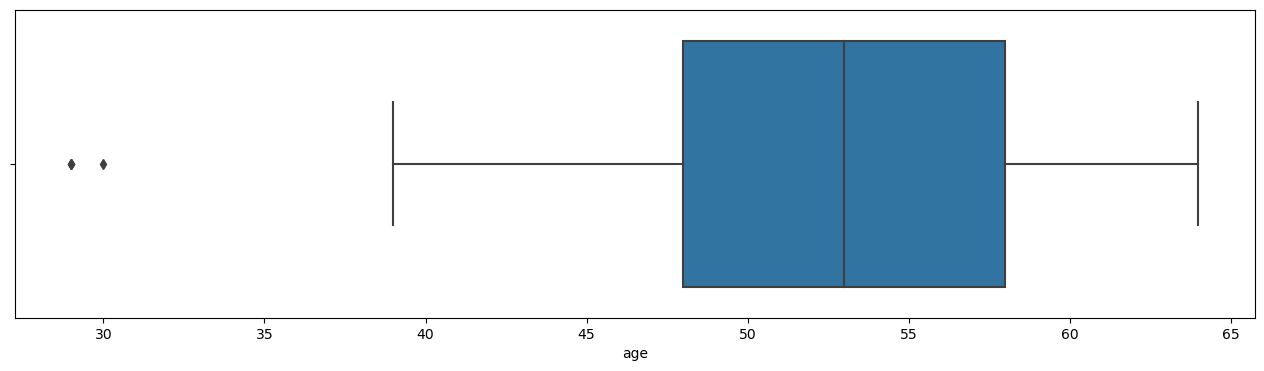

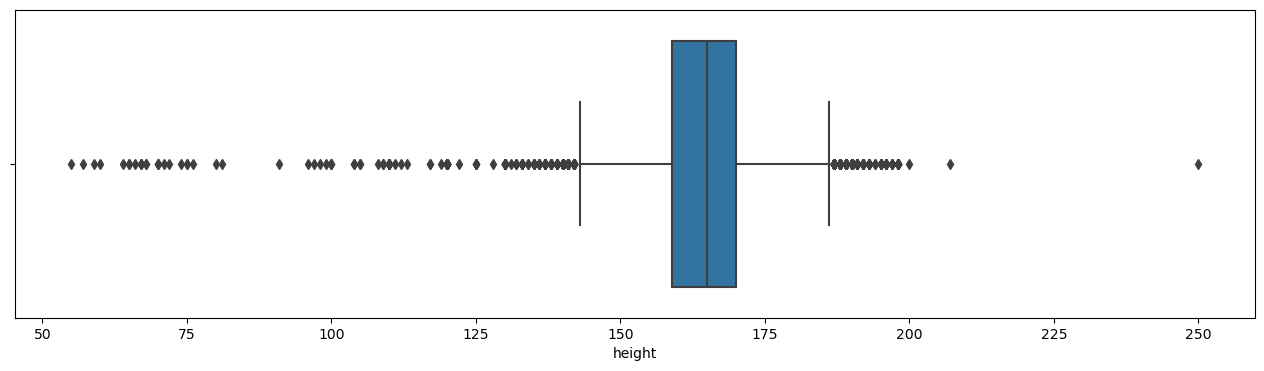

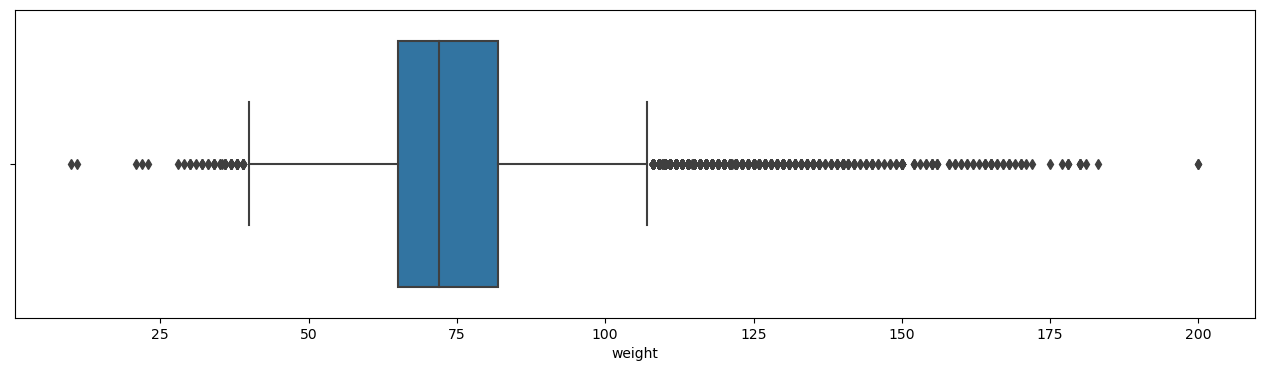

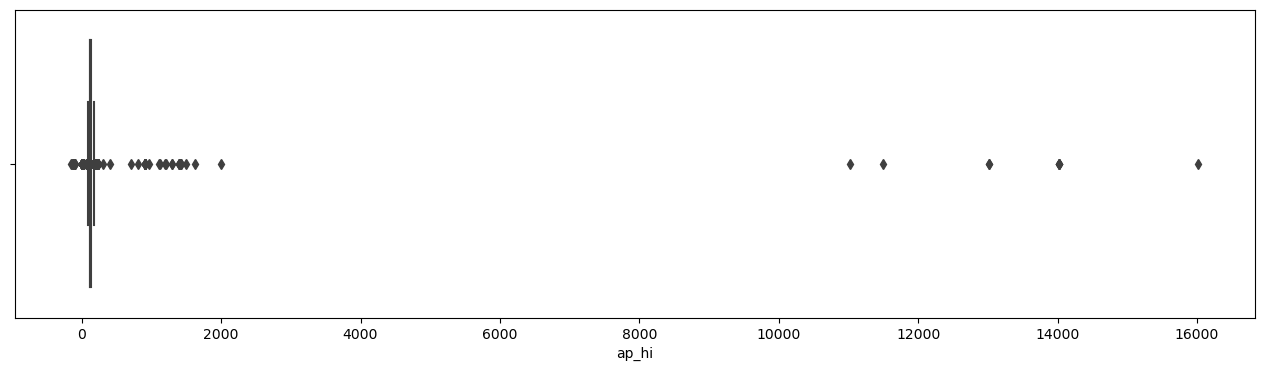

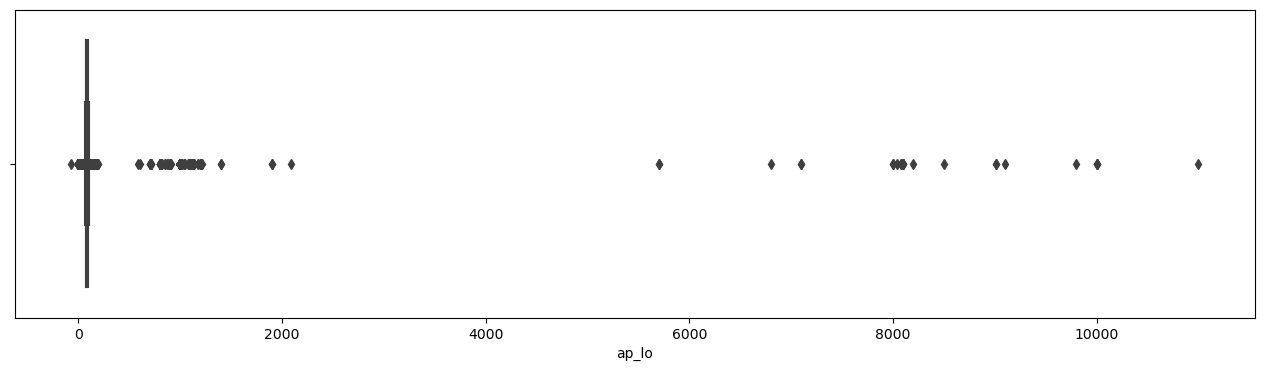

In [ ]:
# Extract numerical attributes from the dataset
numeric_data = pd.DataFrame(Cardio[num_attribs])

# Boxplot of the numeric data
for var in numeric_data: # iterate over
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(16,4)) # setup the fr
    sb.boxplot(data=Cardio, x=var, orient='h') # box plot

Blood Pressure

Based on the visuals from the boxplot for ap_hi and ap_lo, there are a lot of weird values
(outliers) that can be filtered out. Systolic and Diastolic blood pressure should be within
40 - 200 mmHg

A blood pressure value of 140 mmHg is already considered dangerous, and a blood
pressure of 60 mmHg will be considered as low pressure.

In this prelimary data preparation, we want to find out how many outliers do we have
amongst our current dataset which we will filter out by limiting the blood pressure to 40
-200 mgHg

In [ ]:
# Extract Systolic (ap_hi) and Diastolic (ap_lo) blood pressure
ap_hi = Cardio['ap_hi']
ap_lo = Cardio['ap_lo']
# Print number of unusual training examples
print("The number of training examples have ap_hi and ap_lo outside the range of 40 - 200 mmHg")
Cardio['cardio'].loc[(ap_hi < 40) | (ap_hi > 200) | (ap_lo < 40) | (ap_lo > 140)].count()

The number of training examples have ap_hi and ap_lo outside the range of 40 - 200 mmHg


1303

A total of 1303 data points have ap_hi and ap_lo outside the range of 40 - 200 mmHg which is around 1.8% of the dataset from our preliminary data preparation based on blood pressure alone.

<AxesSubplot:xlabel='ap_lo'>

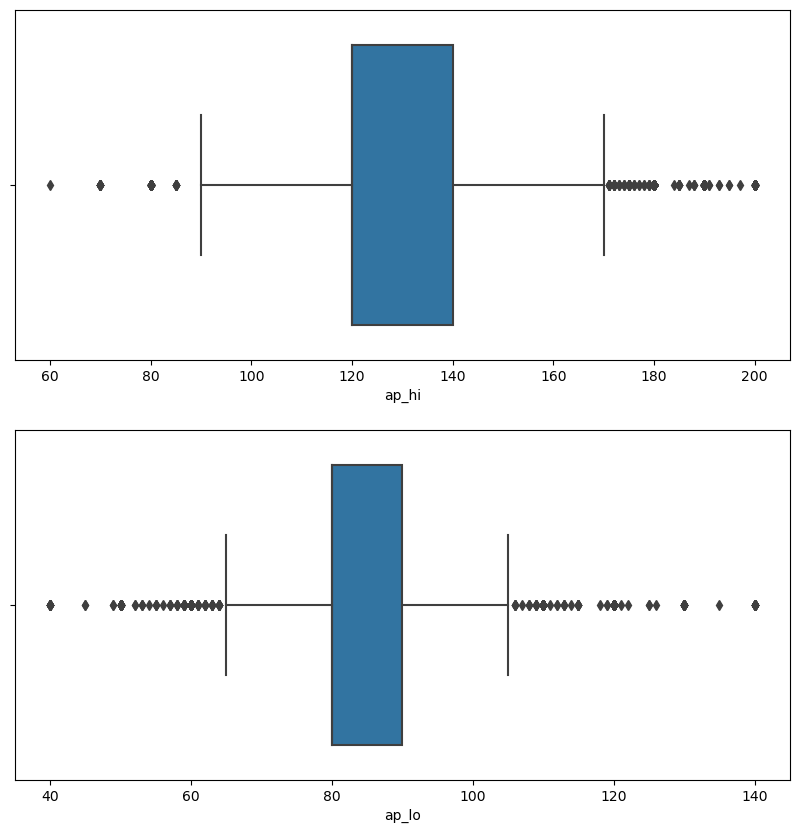

In [ ]:
Cardio1 = Cardio.copy()

Cardio1 = Cardio1.drop(Cardio.loc[(ap_hi < 40) | (ap_hi > 200) | (ap_lo < 40) | (ap_lo > 140)].index)
fig, axes = plt.subplots(nrows=2, figsize=(10,10))
sb.boxplot(data=Cardio1, x='ap_hi', ax=axes[0], orient='h')
sb.boxplot(data=Cardio1, x='ap_lo', ax=axes[1], orient='h')

Considering we have yet to identify the dominant factor as a predictor for CVDs and 
we will potentially lose about 2% of data from the abnormal dataset, we will be converting 
the blood pressure readings into "Category" type to make better use of the data that we have for now.

We will be splitting the data into the 5 level which is shown below (Picture is based on heart.org)

We shall assign the 5 different stages of blood pressure from 1 to 5

1. Normal
2. Elevated
3. High blood pressure (Hypertension) Stage 1
4. High blood pressure (Hypertension) Stage 2
5. Hypertensive crisis (Consult your doctor immediately)

In [ ]:
# Rank Systolic blood pressure
Cardio.loc[ap_hi < 120, 'ap_hi'] = 1
Cardio.loc[(ap_hi >= 120) & (ap_hi < 130), 'ap_hi'] = 2
Cardio.loc[(ap_hi >= 130) & (ap_hi < 140), 'ap_hi'] = 3
Cardio.loc[(ap_hi >= 140) & (ap_hi <= 180), 'ap_hi'] = 4
Cardio.loc[ap_hi > 180, 'ap_hi'] = 5

# Rank Diastolic blood pressure
Cardio.loc[ap_lo < 80, 'ap_lo'] = 1
Cardio.loc[(ap_lo >= 80) & (ap_lo < 90), 'ap_lo'] = 3
Cardio.loc[(ap_lo >= 90) & (ap_lo <= 120), 'ap_lo'] = 4
Cardio.loc[ap_lo > 120, 'ap_lo'] = 5

We shall rank the data points and sort them into the different levels and add a new category replacing ap_hi and ap_lo with a new column called bloodpressure "bp".

In [ ]:
# Rank blood pressure and append it to the dataframe
bp = pd.DataFrame(Cardio[['ap_hi', 'ap_lo']])
Cardio['bp'] = bp.max(axis=1).astype('category')

# Drop ap_hi, ap_lo columns
Cardio = Cardio.drop(columns=['ap_hi', 'ap_lo'])

# Update categorical and numerical attributes
cat_attribs = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'bp', 'cardio']
num_attribs = ['age', 'height', 'weight']

In [ ]:
Cardio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   age          70000 non-null  float64 
 1   gender       70000 non-null  category
 2   height       70000 non-null  int64   
 3   weight       70000 non-null  float64 
 4   cholesterol  70000 non-null  category
 5   gluc         70000 non-null  category
 6   smoke        70000 non-null  category
 7   alco         70000 non-null  category
 8   active       70000 non-null  category
 9   cardio       70000 non-null  int64   
 10  bp           70000 non-null  category
dtypes: category(7), float64(2), int64(2)
memory usage: 2.6 MB
